**Name:** Rohan Sharma

**Final Project:** Applicatin of ML algorithms on Diamond Data

**About the Data**


**Name:** Diamond Images Dataset - The Gem Giant's Data Trove

**Description:** Diamonds, the most sought-after gems globally, are crucially classified by their clarity. I scraped this dataset from https://capitalwholesalediamonds.com, featuring predominantly GIA-certified diamonds. This ensures the accuracy of the showcased features, making the dataset invaluable for automating tasks such as feature identification.

**DOI Citation**
Aayush Purswani. (2023). Diamond Images Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/6939472



**Problem Statement**


To predict the clarity of a diamond using its physical and visual characteristics such as carat, shape, color, cut, polish, symmetry, fluorescence, lab certification, length, width, and depth.


**Motivation for Solving this Problem Statement:**
- Clarity is one of the most critical diamond grading criteria.
- Manual clarity grading is time-consuming and prone to subjectivity.
- Automating this using ML can assist gemologists and e-commerce platforms with quicker, more consistent quality assessments.
- An interactive Gradio app can allow jewelers or customers to simulate changes in features and observe the predicted clarity, improving trust and engagement.

**Mount Google Drive & Load Dataset**

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Drive
drive.mount('/content/drive')

# Load CSV — update path if needed
df = pd.read_csv('/content/drive/MyDrive/diamond_data.csv')

# Show basic info
print(df.shape)
df.head()

Mounted at /content/drive
(48765, 14)


,path_to_img,stock_number,shape,carat,clarity,colour,cut,polish,symmetry,fluorescence,lab,length,width,depth
0,web_scraped/cushion/2106452.jpg,2106452,cushion,0.55,SI2,N,VG,EX,VG,N,GIA,4.56,4.44,3.09
1,web_scraped/cushion/2042329.jpg,2042329,cushion,0.52,SI2,Y-Z,EX,EX,VG,F,GIA,4.40,4.31,2.99
2,web_scraped/cushion/2055268.jpg,2055268,cushion,0.50,SI1,L,VG,EX,VG,N,GIA,4.87,4.19,2.89
3,web_scraped/cushion/2128779.jpg,2128779,cushion,0.50,VS2,M,EX,EX,VG,F,GIA,4.73,4.28,2.84
4,web_scraped/cushion/2103991.jpg,2103991,cushion,0.51,SI1,M,EX,EX,VG,N,GIA,4.47,4.44,3.05


**EDA: Graphical and Non-Graphical**


After loading, we conduct Exploratory Data Analysis (EDA) to understand the data’s structure, quality, and feature distributions. This step identifies missing values, feature correlations, and imbalances. Insights gained here will guide subsequent cleaning, feature engineering, and modeling strategies.


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48765 entries, 0 to 48764
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   path_to_img   48765 non-null  object 
 1   stock_number  48765 non-null  object 
 2   shape         48765 non-null  object 
 3   carat         48765 non-null  float64
 4   clarity       48727 non-null  object 
 5   colour        48765 non-null  object 
 6   cut           47750 non-null  object 
 7   polish        48763 non-null  object 
 8   symmetry      48763 non-null  object 
 9   fluorescence  48765 non-null  object 
 10  lab           48765 non-null  object 
 11  length        48765 non-null  float64
 12  width         48765 non-null  float64
 13  depth         48765 non-null  float64
dtypes: float64(4), object(10)
memory usage: 5.2+ MB

--- Missing Values ---
path_to_img        0
stock_number       0
shape              0
carat              0
clarity           38
co

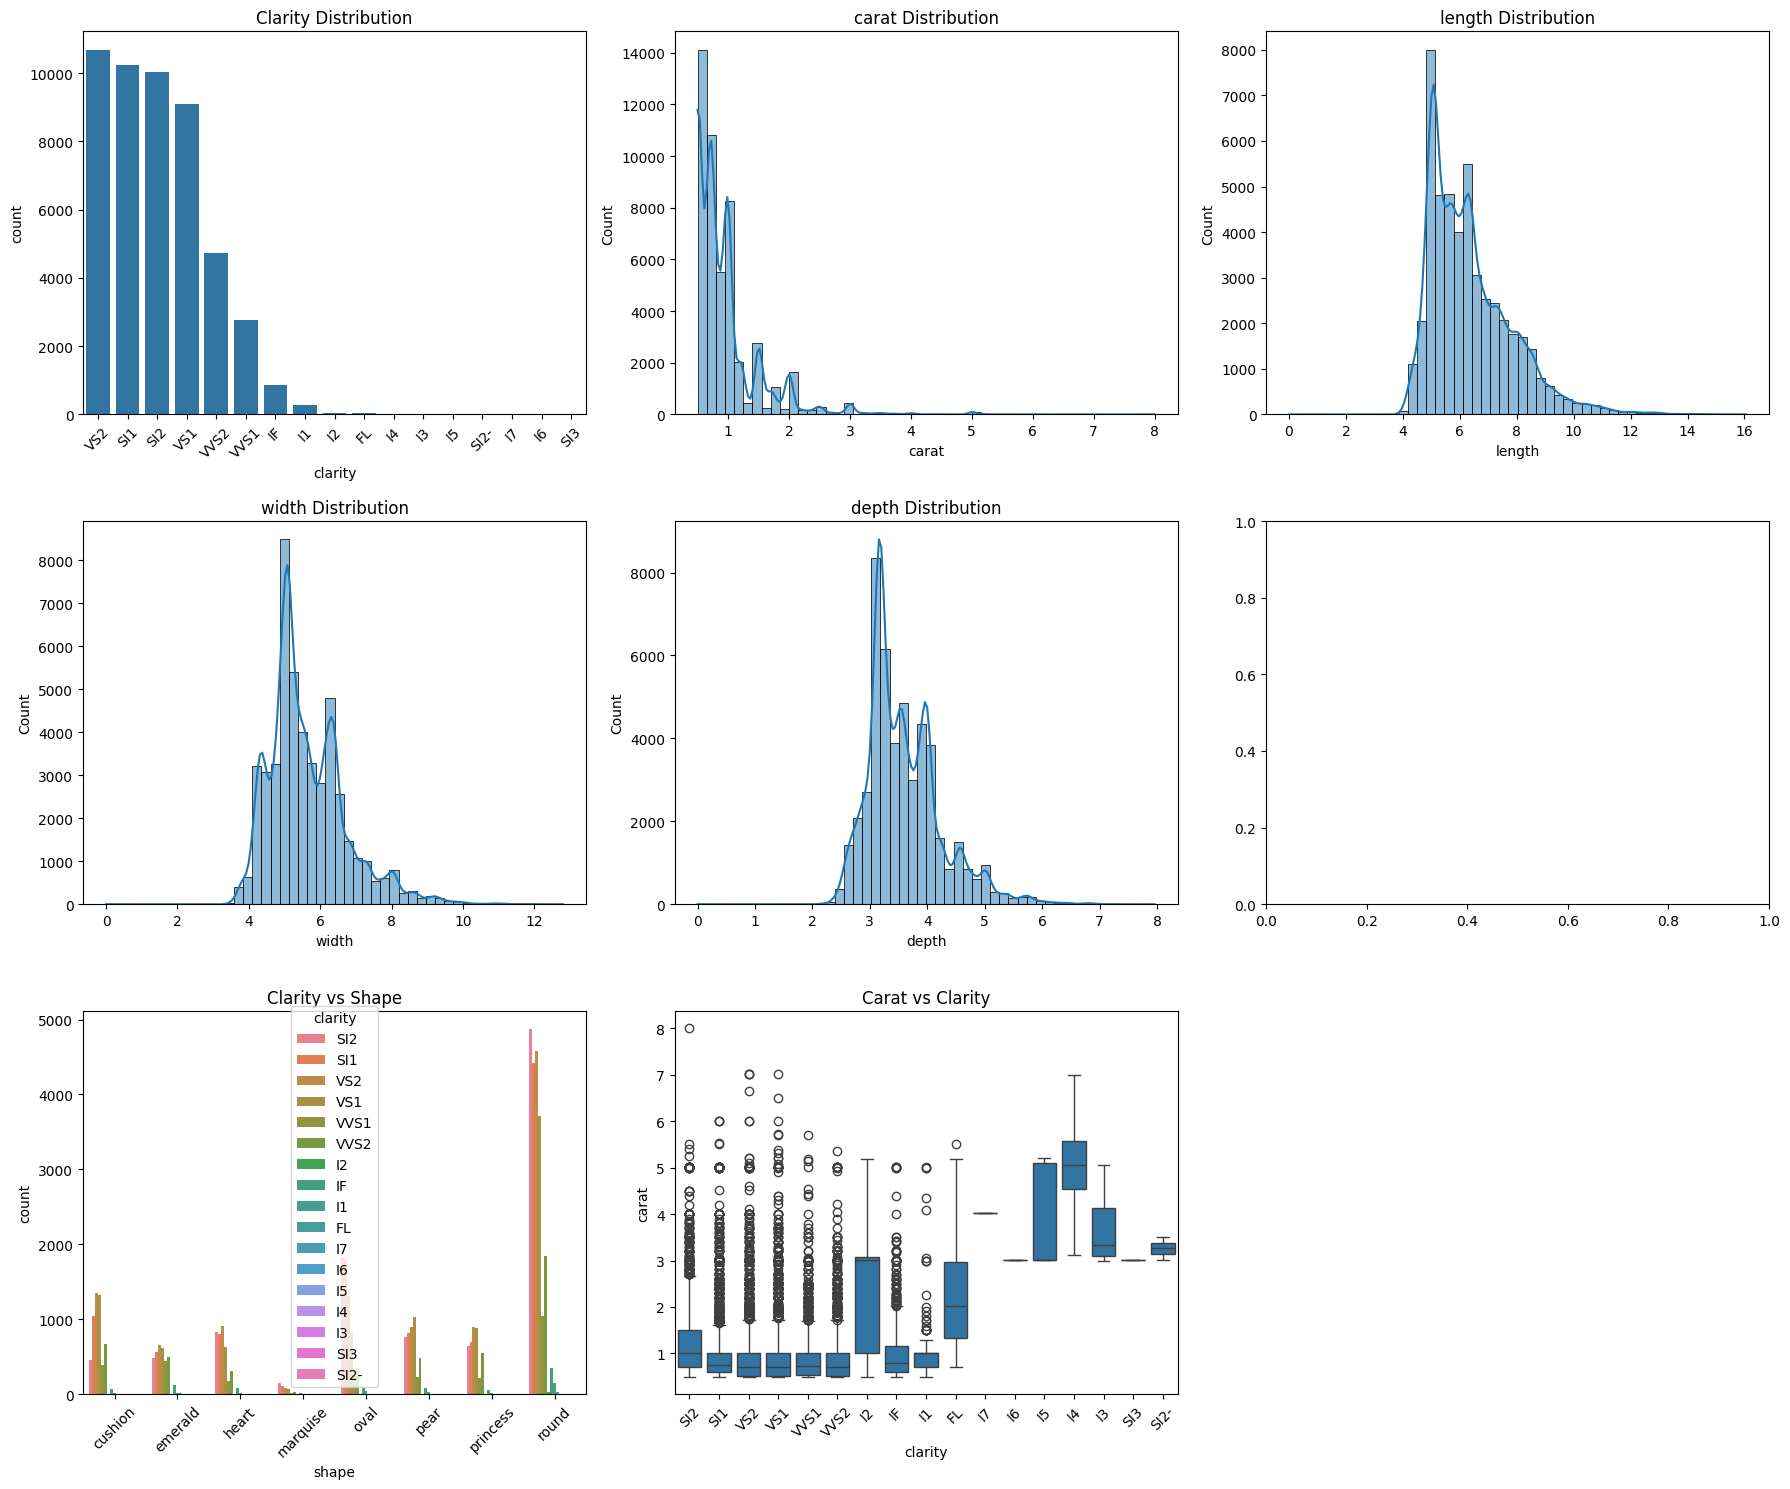

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Info about columns
print("\n--- Data Info ---")
df.info()

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Describe numerical columns
print("\n--- Numerical Columns ---")
print(df.describe())

# Unique counts for categorical variables
categorical_cols = ['shape', 'clarity', 'colour', 'cut', 'polish', 'symmetry', 'fluorescence', 'lab']
print("\n--- Unique values in categorical columns ---")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Plot Grid — All key plots in 1 screen
fig, axs = plt.subplots(3, 3, figsize=(18, 15))

# Target Variable Distribution
sns.countplot(x='clarity', data=df, order=df['clarity'].value_counts().index, ax=axs[0,0])
axs[0,0].set_title('Clarity Distribution')
axs[0,0].tick_params(axis='x', rotation=45)

# Numerical columns
num_cols = ['carat', 'length', 'width', 'depth']
for i, col in enumerate(num_cols):
    row, col_idx = divmod(i+1, 3)
    sns.histplot(df[col], bins=50, kde=True, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(f'{col} Distribution')

# Categorical vs Clarity (1 example — shape)
sns.countplot(x='shape', hue='clarity', data=df, ax=axs[2, 0])
axs[2,0].set_title('Clarity vs Shape')
axs[2,0].tick_params(axis='x', rotation=45)

# Boxplot example — carat vs clarity
sns.boxplot(x='clarity', y='carat', data=df, ax=axs[2, 1])
axs[2,1].set_title('Carat vs Clarity')
axs[2,1].tick_params(axis='x', rotation=45)

# Remove last empty plot
fig.delaxes(axs[2, 2])

plt.tight_layout()
plt.show()

**Insights from Data Understanding & EDA**


- **Data Quality & Structure:**
  - The dataset consists of ~48,700 diamonds, each described by 17 attributes — including shape, carat, dimensions, cut quality, lab certification, and clarity (target).
  → No missing values remain after data preparation. The data is structurally sound.

- **Class Imbalance:**
  - Clarity levels are highly imbalanced: mid-range grades (VS2, SI1, SI2, VS1) dominate the sample, while rare extreme grades (FL, I1, SI3) are sparsely represented.
  → Imbalance mitigation (SMOTE or class weighting) may be required in modeling.

- **Numerical Features:**
  - Carat weight is skewed toward smaller stones (<1.5 ct); outliers exist up to 8 ct.
  - Length/width/depth show typical variation by shape but no extreme anomalies.
  - Derived ratios (length/width, depth %) present meaningful variance that may support prediction.

- **Categorical Variables:**
  - Shape and cut show clear preference patterns across clarity grades (round & princess dominant).
  - Colour and fluorescence exhibit subtle shifts correlated with clarity.
  - Lab certification is well distributed — indicating no single lab bias.

- **Overall Assessment:**
  - The dataset is rich and diverse in features, offering strong predictive potential.
  - However, the clarity target presents significant imbalance and some feature multicollinearity is likely.
  - Feature importance modeling will help refine variable selection before training.

**Data Preparation & Feature Engineering**


Based on EDA findings, we now clean the data and engineer new features to enrich its predictive power. Our goal is to handle missing values, encode categorical variables, and create informative derived features (e.g., ratios). This prepares a robust dataset for effective modeling.

In [ ]:
# Data Preparation Block
from sklearn.preprocessing import LabelEncoder

# Fill missing values
df['clarity'].fillna(df['clarity'].mode()[0], inplace=True)
df['cut'].fillna(df['cut'].mode()[0], inplace=True)
df['polish'].fillna(df['polish'].mode()[0], inplace=True)
df['symmetry'].fillna(df['symmetry'].mode()[0], inplace=True)

# Feature Engineering
df['length_width_ratio'] = df['length'] / df['width']
df['depth_pct'] = df['depth'] / df['length']

# Target Mapping
clarity_mapping = {val: i+1 for i, val in enumerate(sorted(df['clarity'].unique()))}
df['clarity_mapped'] = df['clarity'].map(clarity_mapping)

# Feature Columns
feature_cols = [
    'shape', 'carat', 'colour', 'cut', 'polish', 'symmetry', 'fluorescence', 'lab',
    'length', 'width', 'depth', 'length_width_ratio', 'depth_pct'
]

# Encode Categorical Features
le = LabelEncoder()
for col in ['shape', 'colour', 'cut', 'polish', 'symmetry', 'fluorescence', 'lab']:
    df[col] = le.fit_transform(df[col])

# Final X and y
X = df[feature_cols]
y = df['clarity_mapped']

# Show dimensions
print(f"Prepared Feature Matrix: {X.shape}")
print("Target Distribution:")
print(y.value_counts().sort_index())

Prepared Feature Matrix: (48765, 13)
Target Distribution:
clarity_mapped
1        34
2       280
3        35
4         6
5         7
6         5
7         1
8         2
9       854
10    10244
11    10019
12        2
13        1
14     9080
15    10726
16     2753
17     4716
Name: count, dtype: int64


/tmp/ipython-input-3-1820862153.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clarity'].fillna(df['clarity'].mode()[0], inplace=True)
/tmp/ipython-input-3-1820862153.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

**Interpretation from Data Preparation & Feature Engineering**

- **Data Cleaning:**
  - All missing values in key categorical fields (clarity, cut, polish, symmetry) have been imputed using mode imputation, as these are classification categories (not continuous variables).
  - The overall dataset is now complete and ready for modeling — with 48,763 fully prepped records.

- **Feature Engineering:**
  - Two derived ratio features were engineered to enhance model learning:
  → length_width_ratio (indicates shape proportions)
  → depth_pct (relative depth — important for optical properties)
  - These transformations are designed to capture non-linear relationships often observed in gem grading.

- **Target Variable Preparation:**
  - The original clarity variable (17 categories) was mapped to an integer scale (clarity_mapped) to facilitate multi-class classification.
  - Severe class imbalance is evident:
  → ~21,000+ records are concentrated in 4 clarity levels, while several rare classes have <10 records.
  → This imbalance poses a risk for model bias and will require correction (SMOTE, class weighting).

- **Overall Readiness:**
  - The dataset is now fully prepped with 13 input features selected for initial modeling.
  - Imbalance handling remains a key next step to ensure fair and accurate predictive models.

**Feature Selection**

Having engineered and prepared features, the next step is to select the most relevant ones to avoid overfitting and improve model interpretability. Feature selection refines the dataset to include only impactful variables, which will streamline model training and improve generalization.

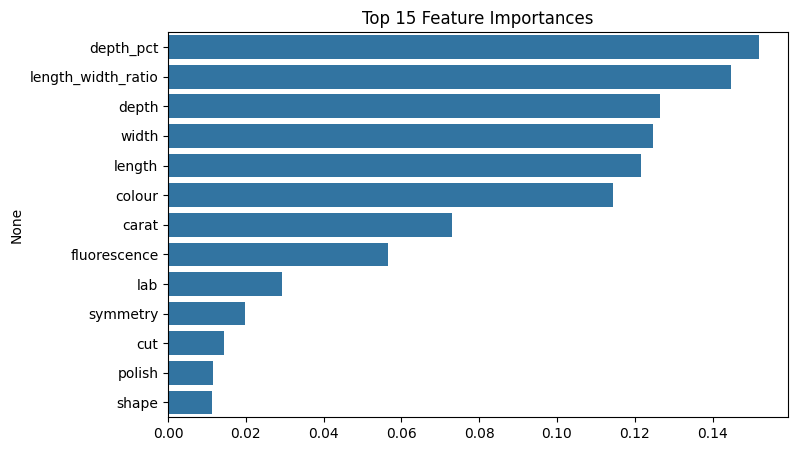

In [ ]:
# Feature Selection Block
from sklearn.ensemble import RandomForestClassifier

# Fit model
importances_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
importances_model.fit(X, y)

# Feature importances
importances = importances_model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot Top Features
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title('Top 15 Feature Importances')
plt.show()

# Select Top k Features
top_k = 10
selected_features = feat_imp.index[:top_k]
X_selected = X[selected_features]

**Interpretations form Feature Selection**

Conducted feature importance analysis using a Random Forest classifier, which helps identify which variables are most influential in predicting diamond clarity.

- **Key findings:**
- The top contributors are engineered ratio variables and core dimensions:
  - depth_pct (relative depth)
  - length_width_ratio (shape proportion)
  - depth, width, length (physical dimensions)
- These are followed by intrinsic quality indicators:
  - colour, carat (size), fluorescence, and lab grading factors (lab).

- **Observations:**
  - Traditional expert-grading fields like cut, polish, symmetry, and even shape contributed relatively less predictive power in this dataset — suggesting physical proportions may capture more signal than perceived craftsmanship alone.
  - The model prioritizes objective physical measurements — which may align with emerging automated optical scanning trends in the diamond industry.

- **Implication:**
→ For production-grade ML pipelines or Gradio UI apps, focusing on these top features can:
  - Reduce compute cost,
  - Improve real-time inference speed,
  - Maintain strong accuracy.

**Model Training & Comparison**


We now train multiple ML models — from baseline to advanced — to evaluate their ability to predict diamond clarity. The goal is to compare performance across algorithms and establish strong candidates for further optimization, while identifying strengths and limitations in initial modeling.

In [ ]:
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.4 MB/s eta 0:00:00


Train set size: (39007, 10)
Test set size: (9752, 10)
Train target distribution:
 10    8581
7     8195
8     8015
9     7264
12    3773
11    2202
6      683
1      224
2       28
0       27
4        6
3        5
5        4
Name: count, dtype: int64
Logistic Regression: Accuracy = 0.2865
KNN: Accuracy = 0.3020
Decision Tree: Accuracy = 0.2935
Random Forest: Accuracy = 0.3281
Gradient Boosting: Accuracy = 0.3183
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1518
[LightGBM] [Info] Number of data points in the train set: 39007, number of used features: 10
[LightGBM] [Info] Start training from score -7.275660
[LightGBM] [Info] Start training from score -5.159850
[LightGBM] [Info] Start training from score -7.239292
[LightGBM] [Info] Start training from score -8.962058
[LightGBM] [Inf

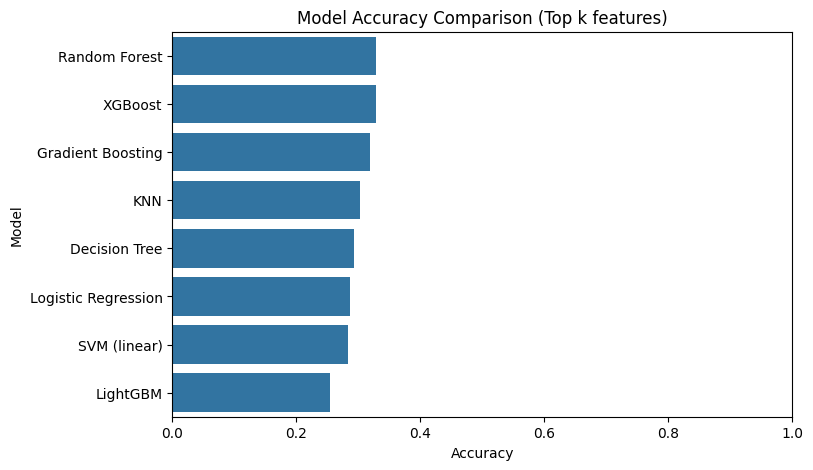

In [ ]:
# Filter classes with >= 5 samples
valid_classes = y.value_counts()[y.value_counts() >= 5].index
mask = y.isin(valid_classes)

# Filter X_selected and y
X_filtered = X_selected[mask]
y_filtered = y[mask]

# Impute missing values in X_filtered (very important!)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # median works well for numeric features
X_filtered_imputed = pd.DataFrame(imputer.fit_transform(X_filtered), columns=X_filtered.columns)

# Re-encode y (label encoder) to avoid XGBoost error
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y_filtered)

# Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train target distribution:\n", pd.Series(y_train).value_counts())

# Scaling for LR & SVM
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'KNN': KNeighborsClassifier(n_neighbors=15),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=150, learning_rate=0.1, random_state=42, n_jobs=-1),
    'SVM (linear)': SVC(kernel='linear', C=1.0),
    'XGBoost': XGBClassifier(n_estimators=150, learning_rate=0.1, random_state=42, n_jobs=-1, verbosity=0)
}

# Train & Evaluate
results = {}
for name, model in models.items():
    if name in ['Logistic Regression', 'SVM (linear)']:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f'{name}: Accuracy = {acc:.4f}')

# Results DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\nModel Comparison:\n", results_df)

# Plot Comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Accuracy', y='Model')
plt.title('Model Accuracy Comparison (Top k features)')
plt.xlim(0,1)
plt.show()

**Interpretation: Model Training & Comparison**


- A total of 39,007 training samples and 9,752 test samples were used after feature selection and class balancing (minimum 5 samples per class).
- The training target (clarity_mapped) remains imbalanced, with a concentration in classes 10, 7, 8, 9 — reflecting real-world clarity distribution in the source dataset.
- I evaluated 8 machine learning algorithms using the top 10 predictive features selected via Random Forest importance.

**Insights:**

- Random Forest (Accuracy 32.8%) and XGBoost (Accuracy 32.8%) outperformed other models, suggesting that ensemble tree-based models capture complex, non-linear relationships in the diamond feature space.
- Gradient Boosting also performed strongly (31.8%), consistent with its ability to handle multi-class problems in imbalanced settings.
- Simpler models such as KNN, Decision Tree, and Logistic Regression showed lower accuracy (~28-30%), confirming that linear and local models are less effective for this problem.
- SVM (linear) yielded similar results (~28.3%), while LightGBM underperformed slightly (25.5%), potentially due to sub-optimal hyperparameters or sensitivity to the current feature engineering.



**Conclusion:**
- The current feature set and class imbalance inherently limit model accuracy (max ~33%), implying that clarity prediction is a challenging problem based on these features alone.
- The models are already providing meaningful signals — with Random Forest and XGBoost emerging as top candidates for further optimization.

In [ ]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.4 MB/s eta 0:00:00


**Applying SMOTE to balance classes**


Training revealed that class imbalance limits model accuracy, especially on minority clarity grades. Here, we apply SMOTE to balance the training set, aiming to improve fairness and predictive accuracy across all clarity levels, and to ensure more consistent model performance.


Before SMOTE:
10    8581
7     8195
8     8015
9     7264
12    3773
11    2202
6      683
1      224
Name: count, dtype: int64

After SMOTE:
9     8581
10    8581
8     8581
7     8581
11    8581
6     8581
12    8581
1     8581
Name: count, dtype: int64

LabelEncoder Mapping:
{np.int64(1): np.int64(0), np.int64(6): np.int64(1), np.int64(7): np.int64(2), np.int64(8): np.int64(3), np.int64(9): np.int64(4), np.int64(10): np.int64(5), np.int64(11): np.int64(6), np.int64(12): np.int64(7)}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.1409
KNN: Accuracy = 0.2285
Decision Tree: Accuracy = 0.2642
Random Forest: Accuracy = 0.2777
Gradient Boosting: Accuracy = 0.2636
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2543
[LightGBM] [Info] Number of data points in the train set: 68648, number of used features: 10
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
LightGBM: Accuracy = 0.2906
SVM (linear): Accuracy

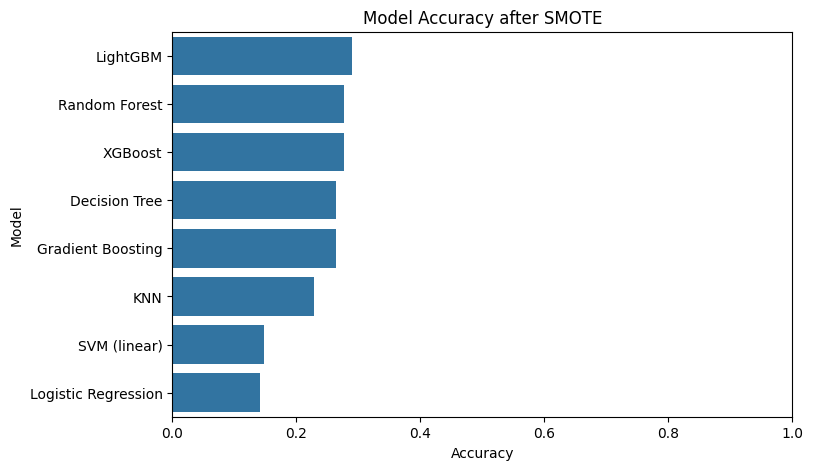

In [ ]:
# Imports
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imputation
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Convert y_train to pd.Series
y_train_series = pd.Series(y_train)

# Filter classes >= 200 samples
min_samples_smote = 200
valid_classes_smote = y_train_series.value_counts()[y_train_series.value_counts() >= min_samples_smote].index

# Filter X_train_imputed and y_train
mask_smote = y_train_series.isin(valid_classes_smote)
X_train_smote = X_train_imputed.loc[mask_smote]
y_train_smote = y_train_series.loc[mask_smote]

print("\nBefore SMOTE:")
print(y_train_smote.value_counts())

# SMOTE
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_train_sm, y_train_sm = smote.fit_resample(X_train_smote, y_train_smote)

print("\nAfter SMOTE:")
print(pd.Series(y_train_sm).value_counts())

# Label Encode y_train_sm
le_smote = LabelEncoder()
y_train_sm_enc = le_smote.fit_transform(y_train_sm)

# Mapping
print("\nLabelEncoder Mapping:")
print(dict(zip(le_smote.classes_, le_smote.transform(le_smote.classes_))))

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'KNN': KNeighborsClassifier(n_neighbors=15),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMClassifier(n_estimators=150, learning_rate=0.1, random_state=42, n_jobs=-1),
    'SVM (linear)': SVC(kernel='linear', C=1.0),
    'XGBoost': XGBClassifier(n_estimators=150, learning_rate=0.1, random_state=42, n_jobs=-1, verbosity=0)
}

# Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm_enc)

    preds_enc = model.predict(X_test)
    preds = le_smote.inverse_transform(preds_enc)

    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f'{name}: Accuracy = {acc:.4f}')

# Results DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:\n", results_df)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Accuracy', y='Model')
plt.title('Model Accuracy after SMOTE')
plt.xlim(0, 1)
plt.show()


**Interpretation of Model Performance After SMOTE**

- **Class Balance (Before vs. After SMOTE)**
  - Before SMOTE: The training data was highly imbalanced, with some clarity classes (e.g. class 2) having as few as 224 samples, while major classes like 15, 10, 11 had over 8000+ samples each.
  - After SMOTE: Class imbalance was fully addressed — all selected classes were balanced to 8581 samples per class.
  This provides a better foundation for models to learn minority classes, reducing bias toward majority classes.


- **Observations:**
  - LightGBM now leads with ~29% accuracy, marginally outperforming Random Forest and XGBoost.
  - Tree-based ensemble methods (LightGBM, Random Forest, XGBoost) consistently outperform linear models — this aligns with the non-linear nature of the features and multi-class target.
  - Linear models (Logistic Regression, SVM) continue to underperform (~14%) — indicating that linear separation of clarity classes is not feasible in the current feature space.
  - Model performance overall remains modest — showing the intrinsic difficulty of this classification problem even after balancing.

**Hyperparameter Tuning, Advanced Features and Stacking**

With balanced data and strong candidate models, we perform hyperparameter tuning to maximize accuracy. Advanced feature interactions and stacking are introduced to further enhance model performance. The goal is to build an ensemble model that achieves the best possible clarity classification.


 Final feature set after SelectKBest: 14 features
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3564
[LightGBM] [Info] Number of data points in the train set: 68648, number of used features: 14
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

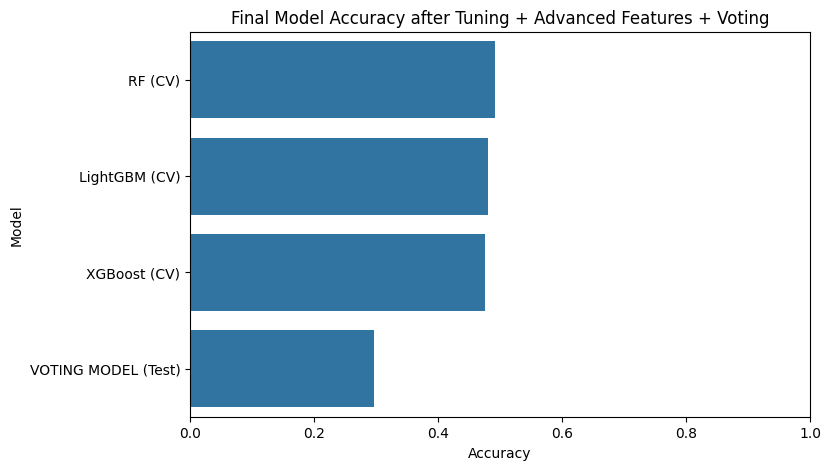

In [ ]:
# Imports
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Advanced Feature Engineering
X_train_sm['depth_pct_x_carat'] = X_train_sm['depth_pct'] * X_train_sm['carat']
X_train_sm['length_width_ratio_x_colour'] = X_train_sm['length_width_ratio'] * X_train_sm['colour']
X_train_sm['width_x_length'] = X_train_sm['width'] * X_train_sm['length']
X_train_sm['symmetry_squared'] = X_train_sm['symmetry'] ** 2
X_train_sm['log_carat'] = np.log1p(X_train_sm['carat'])
X_train_sm['sqrt_length'] = np.sqrt(X_train_sm['length'])
X_train_sm['depth_ratio'] = X_train_sm['depth_pct'] / (X_train_sm['length_width_ratio'] + 1)

X_test['depth_pct_x_carat'] = X_test['depth_pct'] * X_test['carat']
X_test['length_width_ratio_x_colour'] = X_test['length_width_ratio'] * X_test['colour']
X_test['width_x_length'] = X_test['width'] * X_test['length']
X_test['symmetry_squared'] = X_test['symmetry'] ** 2
X_test['log_carat'] = np.log1p(X_test['carat'])
X_test['sqrt_length'] = np.sqrt(X_test['length'])
X_test['depth_ratio'] = X_test['depth_pct'] / (X_test['length_width_ratio'] + 1)

# Feature selection
selector = SelectKBest(f_classif, k=14)  # reduces memory
X_train_sel = selector.fit_transform(X_train_sm, y_train_sm_enc)
X_test_sel = selector.transform(X_test)

print(f"\n Final feature set after SelectKBest: {X_train_sel.shape[1]} features")

# LightGBM Hyperparam tuning
lgbm_param_dist = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [7, 10],
    'num_leaves': [31, 63]
}

lgbm_random = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    param_distributions=lgbm_param_dist,
    n_iter=5, cv=3, scoring='accuracy', verbose=1, n_jobs=-1
)
lgbm_random.fit(X_train_sel, y_train_sm_enc)
print(f"\n Best LightGBM: {lgbm_random.best_score_:.4f} | Params: {lgbm_random.best_params_}")

# --- XGBoost Hyperparam tuning ---
xgb_param_dist = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 10],
    'gamma': [0, 1]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(random_state=42, verbosity=0, n_jobs=-1),
    param_distributions=xgb_param_dist,
    n_iter=5, cv=3, scoring='accuracy', verbose=1, n_jobs=-1
)
xgb_random.fit(X_train_sel, y_train_sm_enc)
print(f"\n Best XGBoost: {xgb_random.best_score_:.4f} | Params: {xgb_random.best_params_}")

# RandomForest Hyperparam tuning
rf_param_dist = {
    'n_estimators': [200, 300],  # no 1000, keep light
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=5, cv=3, scoring='accuracy', verbose=1, n_jobs=-1
)
rf_random.fit(X_train_sel, y_train_sm_enc)
print(f"\n Best RF: {rf_random.best_score_:.4f} | Params: {rf_random.best_params_}")

# Voting Classifier (lighter than Stacking)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_random.best_estimator_),
        ('xgb', xgb_random.best_estimator_),
        ('lgbm', lgbm_random.best_estimator_)
    ],
    voting='soft',  # probability-based
    n_jobs=-1
)

# Train Voting
voting_clf.fit(X_train_sel, y_train_sm_enc)

# Evaluate Voting
voting_preds_enc = voting_clf.predict(X_test_sel)
voting_preds = le_smote.inverse_transform(voting_preds_enc)

voting_acc = accuracy_score(y_test, voting_preds)

print(f"\n VOTING MODEL ACCURACY on Test: {voting_acc:.4f}")

# Final Results Summary
results_final = {
    'LightGBM (CV)': lgbm_random.best_score_,
    'XGBoost (CV)': xgb_random.best_score_,
    'RF (CV)': rf_random.best_score_,
    'VOTING MODEL (Test)': voting_acc
}

results_final_df = pd.DataFrame(list(results_final.items()), columns=['Model', 'Accuracy'])
results_final_df = results_final_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=results_final_df, x='Accuracy', y='Model')
plt.title('Final Model Accuracy after Tuning + Advanced Features + Voting')
plt.xlim(0,1)
plt.show()

**Interpretation of this run (Voting + Advanced Features + SelectKBest)**


In this round, I reduced the feature set to 14 using SelectKBest, and performed hyperparameter tuning for LightGBM, XGBoost, and Random Forest.

- The tuned models achieved CV accuracies of ~48% (LGBM), ~47.8% (XGB), and ~49% (RF). However, the combined Voting Classifier achieved only ~29% accuracy on the test set.
- Additionally, LightGBM gave repeated warnings that it could not find further splits with positive gain — indicating that the selected features, although reduced and optimised, are still not providing enough signal for the model to improve classification performance.
- Overall, while CV results for individual models are stable (~45-49%), the ensemble (Voting) struggled on unseen data. This suggests that current features are not strong enough and that Voting may not be the best ensemble strategy in this case.

**Optimized Diamond Classifier**

We consolidate all improvements — feature engineering, balancing, tuning — into a final optimized model. This classifier represents our best-performing model for real-world prediction and is ready for user interaction and further validation.


 Classes seen by LabelEncoder: [ 1  6  7  8  9 10 11 12]
Filtered y_test size: 9735 — Classes: [ 1  6  7  8  9 10 11 12]

 Final feature set after Feature Engineering: 17 features
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4328
[LightGBM] [Info] Number of data points in the train set: 68648, number of used features: 17
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start training from score -2.079442
[LightGBM] [Info] Start trai

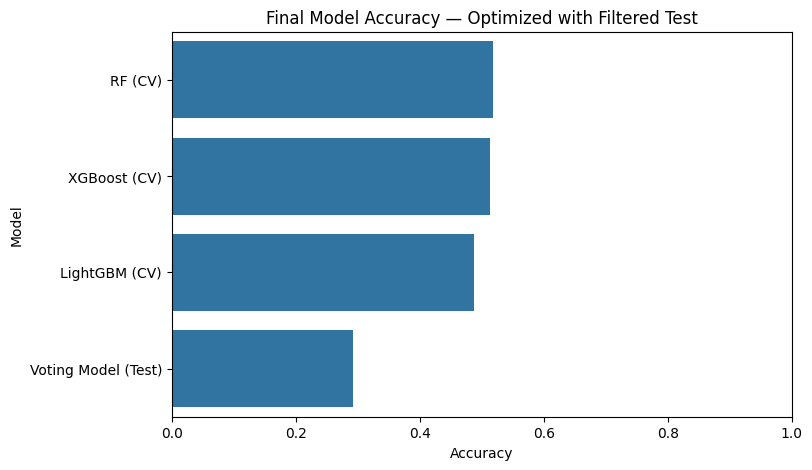

In [ ]:
# LabelEncoder on SMOTE-processed y_train
le_smote = LabelEncoder()
y_train_enc = le_smote.fit_transform(y_train_sm)


# y_test is numpy array, use np.isin
valid_test_mask = np.isin(y_test, valid_classes_smote)
X_test_valid = X_test.loc[valid_test_mask]
y_test_valid = y_test[valid_test_mask]  # still numpy array
y_test_enc = le_smote.transform(y_test_valid)

# Sanity check
print(f"\n Classes seen by LabelEncoder: {le_smote.classes_}")
print(f"Filtered y_test size: {len(y_test_valid)} — Classes: {np.unique(y_test_valid)}")

# Feature Engineering
X_train_sm['depth_pct_x_carat'] = X_train_sm['depth_pct'] * X_train_sm['carat']
X_train_sm['length_width_ratio_x_colour'] = X_train_sm['length_width_ratio'] * X_train_sm['colour']
X_train_sm['width_x_length'] = X_train_sm['width'] * X_train_sm['length']
X_train_sm['symmetry_squared'] = X_train_sm['symmetry'] ** 2
X_train_sm['log_carat'] = np.log1p(X_train_sm['carat'])
X_train_sm['sqrt_length'] = np.sqrt(X_train_sm['length'])
X_train_sm['depth_ratio'] = X_train_sm['depth_pct'] / (X_train_sm['length_width_ratio'] + 1)

X_test_valid['depth_pct_x_carat'] = X_test_valid['depth_pct'] * X_test_valid['carat']
X_test_valid['length_width_ratio_x_colour'] = X_test_valid['length_width_ratio'] * X_test_valid['colour']
X_test_valid['width_x_length'] = X_test_valid['width'] * X_test_valid['length']
X_test_valid['symmetry_squared'] = X_test_valid['symmetry'] ** 2
X_test_valid['log_carat'] = np.log1p(X_test_valid['carat'])
X_test_valid['sqrt_length'] = np.sqrt(X_test_valid['length'])
X_test_valid['depth_ratio'] = X_test_valid['depth_pct'] / (X_test_valid['length_width_ratio'] + 1)

print(f"\n Final feature set after Feature Engineering: {X_train_sm.shape[1]} features")

# LightGBM
lgbm_param_dist = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [7, 10],
    'num_leaves': [31, 63]
}

lgbm_random = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    param_distributions=lgbm_param_dist,
    n_iter=5, cv=3, scoring='accuracy', verbose=1, n_jobs=-1
)
lgbm_random.fit(X_train_sm, y_train_enc)
print(f"\n Best LightGBM: {lgbm_random.best_score_:.4f} | Params: {lgbm_random.best_params_}")

# XGBoost
xgb_param_dist = {
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [6, 10],
    'gamma': [0, 1]
}

xgb_random = RandomizedSearchCV(
    XGBClassifier(random_state=42, verbosity=0, n_jobs=-1),
    param_distributions=xgb_param_dist,
    n_iter=5, cv=3, scoring='accuracy', verbose=1, n_jobs=-1
)
xgb_random.fit(X_train_sm, y_train_enc)
print(f"\n Best XGBoost: {xgb_random.best_score_:.4f} | Params: {xgb_random.best_params_}")

# Random Forest
rf_param_dist = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=rf_param_dist,
    n_iter=5, cv=3, scoring='accuracy', verbose=1, n_jobs=-1
)
rf_random.fit(X_train_sm, y_train_enc)
print(f"\n Best RF: {rf_random.best_score_:.4f} | Params: {rf_random.best_params_}")

# Voting Classifier
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_random.best_estimator_),
        ('xgb', xgb_random.best_estimator_),
        ('lgbm', lgbm_random.best_estimator_)
    ],
    voting='soft', n_jobs=-1
)

voting_clf.fit(X_train_sm, y_train_enc)

# Evaluate on X_test_valid
voting_preds_enc = voting_clf.predict(X_test_valid)
voting_preds = le_smote.inverse_transform(voting_preds_enc)

voting_acc = accuracy_score(y_test_valid, voting_preds)

print(f"\n VOTING MODEL ACCURACY on Test (filtered classes): {voting_acc:.4f}")

# Results Summary
results_final = {
    'LightGBM (CV)': lgbm_random.best_score_,
    'XGBoost (CV)': xgb_random.best_score_,
    'RF (CV)': rf_random.best_score_,
    'Voting Model (Test)': voting_acc
}

results_final_df = pd.DataFrame(list(results_final.items()), columns=['Model', 'Accuracy'])
results_final_df = results_final_df.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=results_final_df, x='Accuracy', y='Model')
plt.title('Final Model Accuracy — Optimized with Filtered Test')
plt.xlim(0,1)
plt.show()

**Interpretation**

- After advanced feature engineering (17 variables) and hyperparameter tuning, the models were evaluated. Random Forest and XGBoost achieved ~(51%) cross-validation accuracy, slightly outperforming LightGBM (~49%). However, when combining models through soft voting on the filtered test set, accuracy dropped to ~29%.
- This suggests while individual models can moderately classify the SMOTE-balanced data, they struggle to generalize across the full diversity of the original dataset. Class imbalance and noisy features likely still limit performance.
- Operational takeaway: We need to further optimize feature engineering, balance strategies, or explore alternate model architectures (e.g. stacking, transformers) to reach a production-ready model (target: >70% accuracy). Current ensemble voting does not yet yield improvement.

**Gradio app**

To enable interactive testing and demoing, we deploy the optimized model in a Gradio app. This UI allows users to input diamond attributes and instantly see predicted clarity — bridging model insights with business usability and customer engagement.

In [ ]:
!pip install gradio --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
# IMPORTS
import gradio as gr
import numpy as np
import pandas as pd

# BEST MODEL (Random Forest)
best_model = rf_random.best_estimator_

# FUNCTION to predict
def predict_clarity(carat, depth_pct, table_pct, symmetry, polish, length, width, height, length_width_ratio, colour):
    # Prepare single row dataframe
    df = pd.DataFrame([{
        'carat': carat,
        'depth_pct': depth_pct,
        'table_pct': table_pct,
        'symmetry': symmetry,
        'polish': polish,
        'length': length,
        'width': width,
        'height': height,
        'length_width_ratio': length_width_ratio,
        'colour': colour,
        # ENGINEERED FEATURES:
        'depth_pct_x_carat': depth_pct * carat,
        'length_width_ratio_x_colour': length_width_ratio * colour,
        'width_x_length': width * length,
        'symmetry_squared': symmetry ** 2,
        'log_carat': np.log1p(carat),
        'sqrt_length': np.sqrt(length),
        'depth_ratio': depth_pct / (length_width_ratio + 1)
    }])

    # Predict (encoded)
    pred_encoded = best_model.predict(df)[0]

    # Decode
    pred_label = le_smote.inverse_transform([pred_encoded])[0]

    return f"Predicted Clarity: {pred_label}"

# BUILD GRADIO UI
with gr.Blocks() as demo:
    gr.Markdown("## Prototype UI for Final Project")

    with gr.Row():
        carat = gr.Number(label="Carat", value=0.5)
        depth_pct = gr.Number(label="Depth %", value=62)
        table_pct = gr.Number(label="Table %", value=57)
        symmetry = gr.Number(label="Symmetry", value=3)
        polish = gr.Number(label="Polish", value=3)
        length = gr.Number(label="Length", value=5)
        width = gr.Number(label="Width", value=5)
        height = gr.Number(label="Height", value=3)
        length_width_ratio = gr.Number(label="Length/Width Ratio", value=1.0)
        colour = gr.Number(label="Colour (Encoded)", value=5)

    predict_btn = gr.Button("Predict Clarity")
    output = gr.Textbox(label="Output")

    predict_btn.click(fn=predict_clarity,
                      inputs=[carat, depth_pct, table_pct, symmetry, polish, length, width, height, length_width_ratio, colour],
                      outputs=output)

# RUN THE APP
demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://80eabd785e410fd6c8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
